In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline

In [2]:
data = pd.read_pickle('/home/isabelle/Downloads/latest_coin_data.pkl')

In [3]:
data.head()

,"Jul 04, 2018","Jul 03, 2018","Jul 02, 2018","Jul 01, 2018","Jun 30, 2018","Jun 29, 2018","Jun 28, 2018","Jun 27, 2018","Jun 26, 2018","Jun 25, 2018",...,"Jan 10, 2016","Jan 09, 2016","Jan 08, 2016","Jan 07, 2016","Jan 06, 2016","Jan 05, 2016","Jan 04, 2016","Jan 03, 2016","Jan 02, 2016","Jan 01, 2016"
007coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'open_price': 0.001377, 'high_price': 0.00138...","{'open_price': 0.001441, 'high_price': 0.00144...","{'open_price': 0.001474, 'high_price': 0.00147...","{'open_price': 0.001477, 'high_price': 0.00148...","{'open_price': 0.00149, 'high_price': 0.001501..."
0chain,"{'open_price': 0.50634, 'high_price': 0.537679...","{'open_price': 0.480519, 'high_price': 0.57753...","{'open_price': 0.496757, 'high_price': 0.53016...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x,"{'open_price': 0.887873, 'high_price': 1.03, '...","{'open_price': 0.948858, 'high_price': 0.98870...","{'open_price': 0.79384, 'high_price': 0.989407...","{'open_price': 0.790663, 'high_price': 0.83599...","{'open_price': 0.65948, 'high_price': 0.834762...","{'open_price': 0.606791, 'high_price': 0.67642...","{'open_price': 0.642657, 'high_price': 0.66113...","{'open_price': 0.620553, 'high_price': 0.64416...","{'open_price': 0.708526, 'high_price': 0.70876...","{'open_price': 0.679638, 'high_price': 0.70613...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xbtc,"{'open_price': 1.13, 'high_price': 1.27, 'low_...","{'open_price': 1.11, 'high_price': 1.35, 'low_...","{'open_price': 0.904018, 'high_price': 1.14, '...","{'open_price': 0.868081, 'high_price': 0.95885...","{'open_price': 0.87697, 'high_price': 1.03, 'l...","{'open_price': 0.972314, 'high_price': 0.99065...","{'open_price': 0.989203, 'high_price': 1.08, '...","{'open_price': 1.11, 'high_price': 1.15, 'low_...","{'open_price': 1.2, 'high_price': 1.31, 'low_p...","{'open_price': 1.15, 'high_price': 1.25, 'low_...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10mtoken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#0x
data3 =data[2:3]
new_data3 = data3.T

In [5]:
new_data3.columns = ['A']

In [6]:
df3 = new_data3['A'].apply(pd.Series)

/home/isabelle/.local/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning:

'<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects

/home/isabelle/.local/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning:

'<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects



In [7]:
df3.index.name = 'Date'

In [8]:
df3.reset_index(inplace=True)
print (df3.head())


           Date  open_price  high_price  low_price  close_price      volume  \
0  Jul 04, 2018    0.887873    1.030000   0.859933     0.949942  18949000.0   
1  Jul 03, 2018    0.948858    0.988706   0.886003     0.891924  21272400.0   
2  Jul 02, 2018    0.793840    0.989407   0.789722     0.950831  40158300.0   
3  Jul 01, 2018    0.790663    0.835991   0.735183     0.796163  12751400.0   
4  Jun 30, 2018    0.659480    0.834762   0.659480     0.791598  25434300.0   

    market_cap   0  
0  473463000.0 NaN  
1  506007000.0 NaN  
2  423247000.0 NaN  
3  421499000.0 NaN  
4  351506000.0 NaN  


In [22]:
df3_new = df3.iloc[::-1]
del df3_new['index']

In [23]:
df3_new.head()

,Date,open_price,high_price,low_price,close_price,volume,market_cap,0
915,"Jan 01, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
914,"Jan 02, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
913,"Jan 03, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,"Jan 04, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,"Jan 05, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Usually use closing prices as indicator
df3price = df3_new['close_price']

In [25]:
roller = df3price.rolling(10)
shortvol = roller.std(ddof=0)

In [26]:
roller2 = df3price.rolling(100)
longvol = roller2.std(ddof=0)

In [27]:
df3_new['short_vol'] = shortvol
df3_new['long_vol'] = longvol

In [29]:
df3_new.tail(30)

,Date,open_price,high_price,low_price,close_price,volume,market_cap,0,short_vol,long_vol
29,"Jun 05, 2018",1.250000,1.280000,1.190000,1.270000,14802100.0,662627000.0,NaN,0.076033,0.393182
28,"Jun 06, 2018",1.270000,1.340000,1.250000,1.330000,17778000.0,674151000.0,NaN,0.078077,0.394689
27,"Jun 07, 2018",1.330000,1.350000,1.290000,1.290000,15059000.0,709555000.0,NaN,0.033481,0.395863
26,"Jun 08, 2018",1.290000,1.300000,1.240000,1.270000,11553900.0,685996000.0,NaN,0.032388,0.396800
25,"Jun 09, 2018",1.270000,1.290000,1.230000,1.230000,9623670.0,677562000.0,NaN,0.033705,0.397506
24,"Jun 10, 2018",1.230000,1.230000,1.020000,1.060000,17417800.0,654732000.0,NaN,0.073512,0.397523
23,"Jun 11, 2018",1.050000,1.080000,1.010000,1.070000,12220200.0,559631000.0,NaN,0.092390,0.397519
22,"Jun 12, 2018",1.070000,1.070000,0.888190,0.904317,18970100.0,567030000.0,NaN,0.134472,0.397555
21,"Jun 13, 2018",0.907088,0.921793,0.798640,0.821614,13819300.0,482209000.0,NaN,0.166727,0.397788
20,"Jun 14, 2018",0.821271,0.983472,0.812555,0.945688,16718500.0,436546000.0,NaN,0.173819,0.397259


In [32]:
import matplotlib.dates as mdates

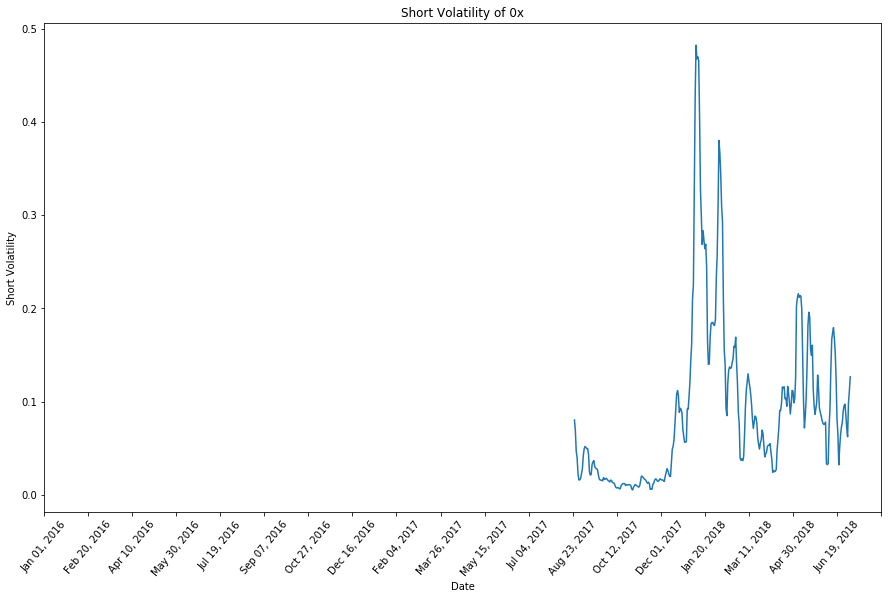

In [35]:
plt.plot(df3_new['Date'], df3_new['short_vol'],)
plt.xticks(rotation=(50))
plt.xticks(np.arange(0,1000,step=50))
plt.xlabel("Date")
plt.ylabel("Short Volatility")
plt.title("Short Volatility of 0x")
plt.show()

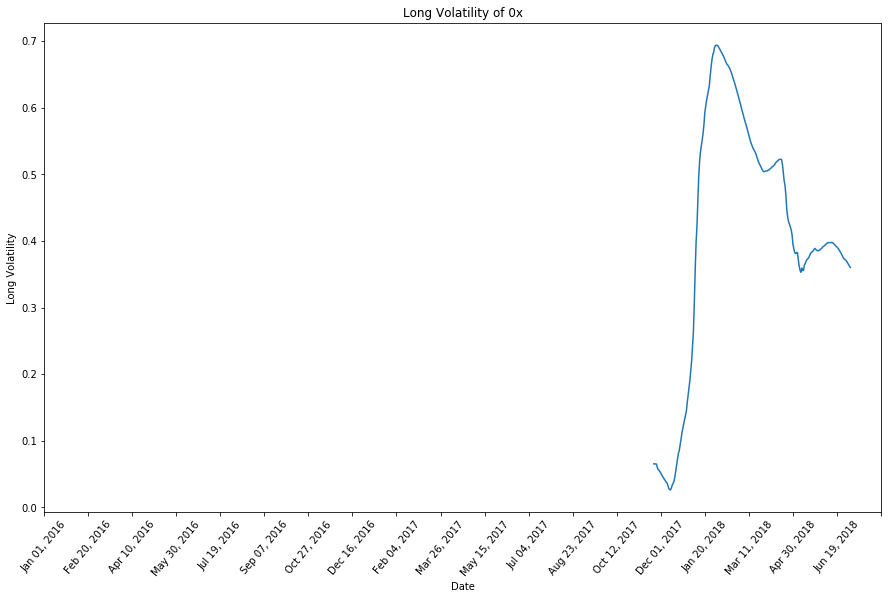

In [36]:
plt.plot(df3_new['Date'], df3_new['long_vol'],)
plt.xticks(rotation=(50))
plt.xticks(np.arange(0,1000,step=50))
plt.xlabel("Date")
plt.ylabel("Long Volatility")
plt.title("Long Volatility of 0x")
plt.show()

In [37]:
df3_new['daily_profit'] = df3_new['close_price'] - df3_new['close_price'].shift(-1)

In [38]:
print(df3_new.tail())

           Date  open_price  high_price  low_price  close_price      volume  \
4  Jun 30, 2018    0.659480    0.834762   0.659480     0.791598  25434300.0   
3  Jul 01, 2018    0.790663    0.835991   0.735183     0.796163  12751400.0   
2  Jul 02, 2018    0.793840    0.989407   0.789722     0.950831  40158300.0   
1  Jul 03, 2018    0.948858    0.988706   0.886003     0.891924  21272400.0   
0  Jul 04, 2018    0.887873    1.030000   0.859933     0.949942  18949000.0   

    market_cap   0  short_vol  long_vol  daily_profit  
4  351506000.0 NaN   0.072062  0.369347     -0.004565  
3  421499000.0 NaN   0.062363  0.367021     -0.154668  
2  423247000.0 NaN   0.098535  0.364532      0.058907  
1  506007000.0 NaN   0.111498  0.362152     -0.058018  
0  473463000.0 NaN   0.126579  0.360269           NaN  


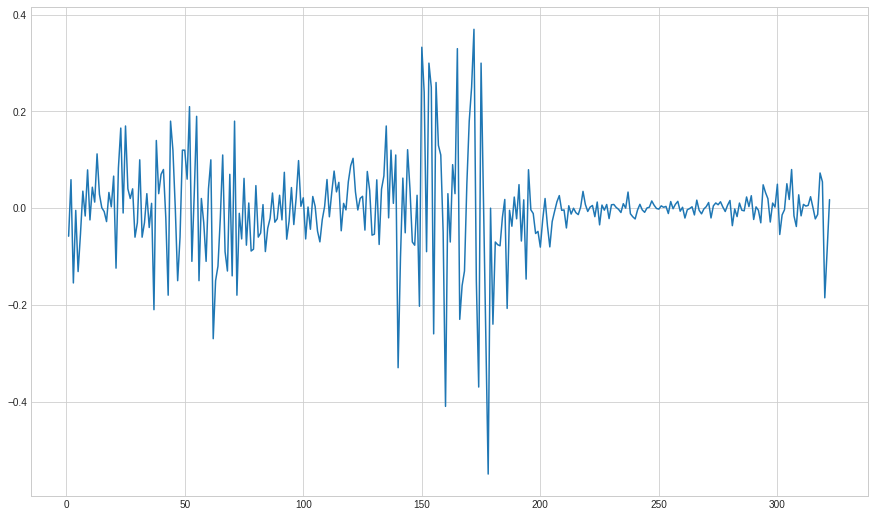

In [147]:
df3_new["daily_profit"].plot(grid = True)

In [39]:
df3_new["cum_profit"]=df3_new["daily_profit"].cumsum()

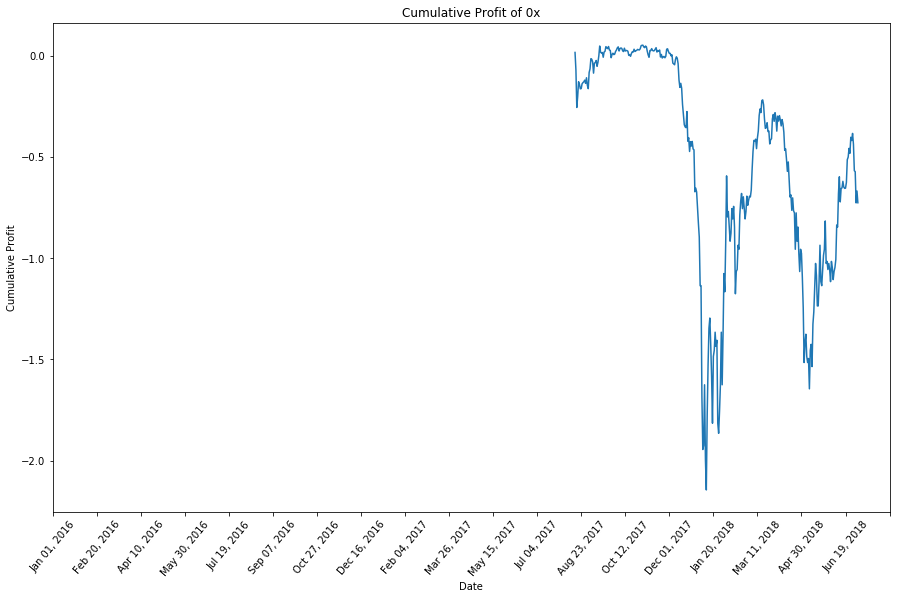

In [40]:
plt.plot(df3_new['Date'], df3_new['cum_profit'],)
plt.xticks(rotation=(50))
plt.xticks(np.arange(0,1000,step=50))
plt.xlabel("Date")
plt.ylabel("Cumulative Profit")
plt.title("Cumulative Profit of 0x")
plt.show()

In [ ]:
SCRAP BELOW

In [41]:
df3_new.head()

,Date,open_price,high_price,low_price,close_price,volume,market_cap,0,short_vol,long_vol,daily_profit,cum_profit
915,"Jan 01, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914,"Jan 02, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913,"Jan 03, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,"Jan 04, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,"Jan 05, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[start_date:end_date]


start_price = data.iloc[0]
exit_price = data.loc[exit_date]
df.loc[df['column_name'] == some_value]

In [170]:
def buy_hold_profits(df, start_date=None, end_date=None, nshares=1):
                    
        # Find starting and ending price of stock
        start_price = df.loc[df['Date'] == start_date]['open_price']
        end_price = df.loc[df['Date'] == end_date]['close_price']
        
        
        # Total profit
        total_hold_profit = nshares * (end_price - start_price)
        
        print(total_hold_profit)
        

IndentationError: unindent does not match any outer indentation level (<ipython-input-170-ca42a8b10f32>, line 11)

In [168]:
buy_hold_profits(df3_new, start_date = 'Jun 30, 2018', end_date= 'Jul 04, 2018', nshares=100  )

0   NaN
4   NaN
dtype: float64


In [ ]:
SCRAP CODE BELOW

In [80]:
short_rolling = df3price.rolling(window=20).mean()
long_rolling = df3price.rolling(window=100).mean()

In [ ]:
# Calculate returns
returns = []
for i in range(len(adjClose[1:])):
    element = adjClose[i]/adjClose[i-1]
    element = math.log(element)
    returns.append((element))
returns = returns[1:]

mean_returns = np.mean(returns)
vol = []
for i in range(len(returns)):
    element = (returns[i]-mean_returns)**2
    element=math.sqrt((element))
    vol.append(element)
for i in range(len(vol)):
    vol[i]*=math.sqrt(252)
x = x[2:]
plt.plot(x,vol)
plt.show()

In [ ]:
df3['short rolling'] = short_rolling
df3['long rolling sma'] = long_rolling


In [53]:
def get_pnl(prices, start_date, holding_period=90, profit_goal=0.10, cut_loss=.10):
    end_date = start_date + timedelta(days=holding_period)
    data = prices[start_date: end_date]

    start_price = data.iloc[0]
    take_profit = start_price * (1 + profit_goal)
    cut_loss = start_price * (1 - cut_loss)
    exit_date = end_date

    if (data > take_profit).any():
        exit_date = data[data > take_profit].index[0]
    if (data[:exit_date] < cut_loss).any():
        exit_date = data[data < cut_loss].index[0]

    exit_price = data.loc[exit_date]
    print('Entered on {0} at: {1:.2f}, exited on {2} at {3:.2f} for {4:.2f}%'.format(start_date.strftime('%Y-%b-%d'), start_price, exit_date.strftime('%Y-%b-%d'), exit_price, (exit_price/start_price-1)*100))

Populating the interactive namespace from numpy and matplotlib


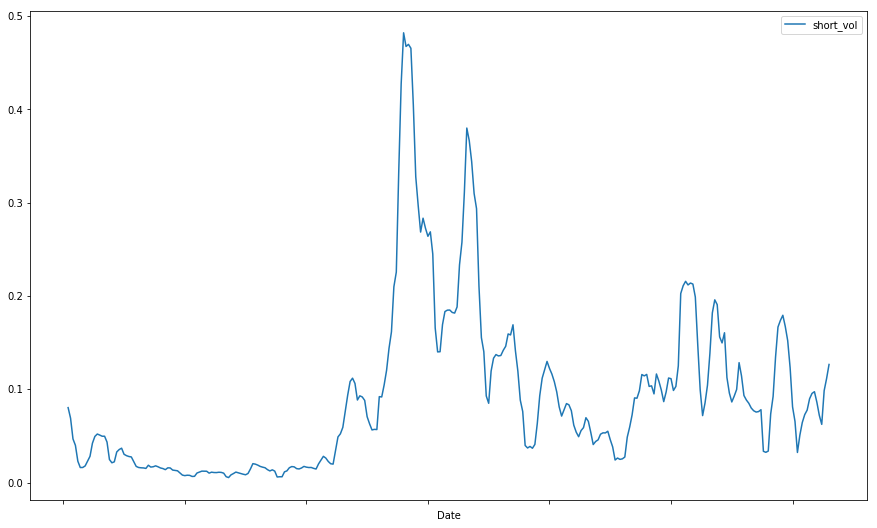

In [30]:
import matplotlib.pyplot as plt 
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   

df3_new.plot(x = 'Date', y = 'short_vol')
#df.plot(x = 'date', y = 'long rolling sma')
#df3_new["short_vol"].plot(grid = True)

In [58]:
df3.buy_and_hold(start_date=' Jan 01, 2016', 
                       end_date='Jul 04, 2018', nshares=100)

AttributeError: 'DataFrame' object has no attribute 'buy_and_hold'

In [66]:
import quandl
import pandas as pd
import numpy as np
import fbprophet
import pytrends
from pytrends.request import TrendReq

# matplotlib pyplot for plotting
import matplotlib.pyplot as plt

import matplotlib

In [69]:
start_price = float(df3[df3['Date'] == start_date]['open_price'])

NameError: name 'start_date' is not defined

In [ ]:
def profit (self, start_date=None, end_date=None, nshares=1):
    

In [118]:
def buy_and_hold(self, start_date=None, end_date=None, nshares=1):
                    
        # Find starting and ending price of stock
        start_price = str(self[self['Date'] == start_date]['open_price'])
        end_price = str(self[self['Date'] == end_date]['close_price'])
        
        # Make a profit dataframe and calculate profit column
        profits = pd.DataFrame(data= (start_date, end_date))
        profits['hold_profit'] = nshares * (profits['close_price'] - start_price)
        
        # Total profit
        total_hold_profit = nshares * (end_price - start_price)
        
        print('{} Total buy and hold profit from {} to {} for {} shares = ${:.2f}'.format
              (self.symbol, start_date.date(), end_date.date(), nshares, total_hold_profit))
        
        # Plot the total profits 
        plt.style.use('dark_background')
        
        # Location for number of profit
        text_location = (end_date - pd.DateOffset(months = 1)).date()
        
        # Plot the profits over time
        plt.plot(profits['Date'], profits['hold_profit'], 'b', linewidth = 3)
        plt.ylabel('Profit ($)'); plt.xlabel('Date'); plt.title('Buy and Hold Profits for {} {} to {}'.format(
                                                                self.symbol, start_date.date(), end_date.date()))
        
        # Display final value on graph
        plt.text(x = text_location, 
             y =  total_hold_profit + (total_hold_profit / 40),
             s = '$%d' % total_hold_profit,
            color = 'g' if total_hold_profit > 0 else 'r',
            size = 14)
        
        plt.grid(alpha=0.2)
plt.show();

In [119]:
buy_and_hold(df3, start_date=' Jan 01, 2016', 
                       end_date='Jul 04, 2018', nshares=100)

ValueError: DataFrame constructor not properly called!

In [ ]:
  if ('Adj. Close' not in stock.columns):
            stock['Adj. Close'] = stock['Close']
            stock['Adj. Open'] = stock['Open']
        
        stock['y'] = stock['Adj. Close']
stock['Daily Change'] = stock['Adj. Close'] - stock['Adj. Open']